# Introduction to Computer Vision

Objective of this lab is to introduce you to basic image processing libraries.


PART 1 Objectives:
1. How to load an image using the cv2 library?
2. True nature of an image
3. How to convert an image from one colorspace to another?
4. How to compare RGB and BGR channels?
5. How to plot an image by creating an array?
6. What are Color Planes? How to compare different channels of a single colorspace?


1. Import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

2. Load the image and change the colorspace

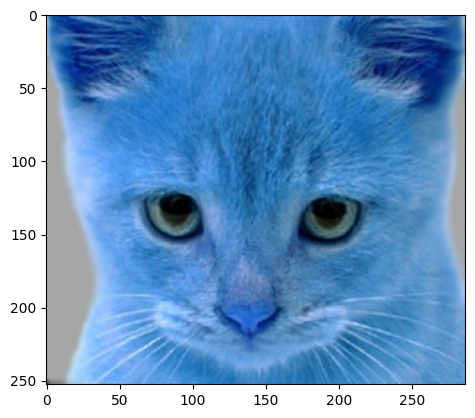

In [ ]:
# load the image
img = cv2.imread('./img1.jpg')
plt.imshow(img)

3. Plot the image in all the colorspaces using matplotlib subplots

Figure(3000x800)


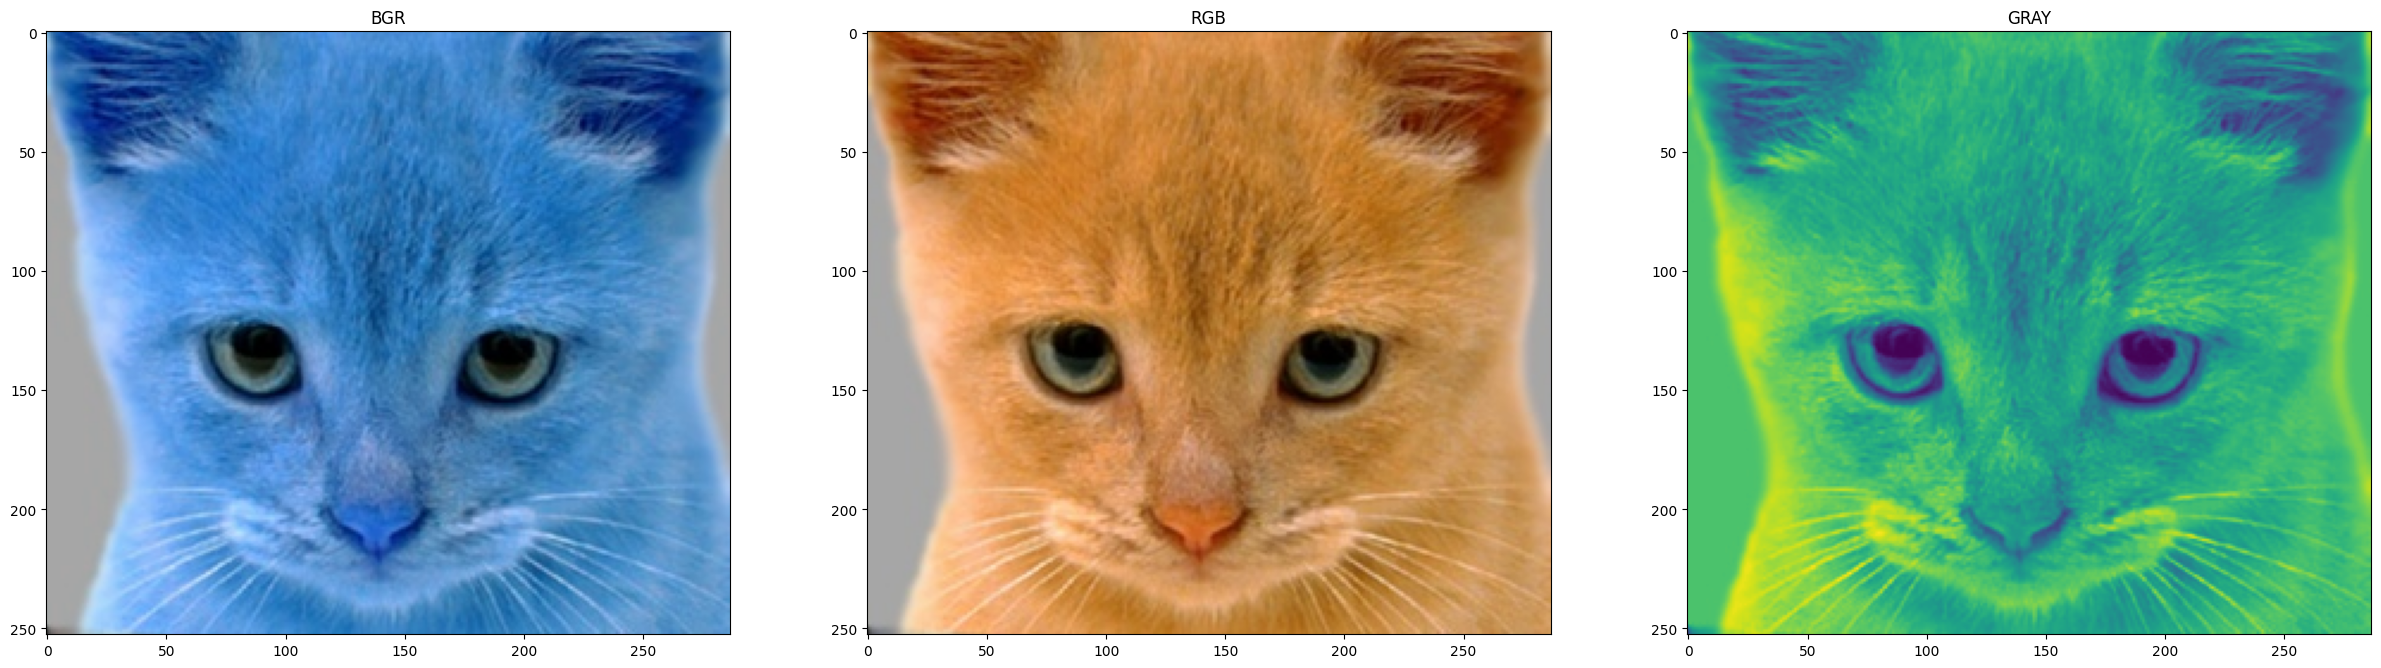

In [ ]:
# Change the image into desired colorspace
bgr = cv2.imread('./img1.jpg')
grayscale = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)


f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,8))   # rows, column, figsize
ax1.set_title('BGR')
ax1.imshow(bgr)
ax2.set_title('RGB')
ax2.imshow(rgb)
ax3.set_title('GRAY')
ax3.imshow(grayscale, cmap='viridis')

In [ ]:
# Try it yourself: Convert img to HSV

#hsv =

#plt.imshow(hsv)

4. Shape of the image

In [ ]:
print(bgr.shape)
print(grayscale.shape)


(253, 287, 3)
(253, 287)


In [ ]:
print(bgr[:1,:1])
print(rgb[:1,:1])

[[[114 168 209]]]
[[[209 168 114]]]


5. Show the number of pixel of image on screen

In [ ]:
!pip install Pillow

In [ ]:
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
image = PIL.Image.open('./img1.jpg')
pixel = image.getpixel((40, 70))
print(pixel)

pixel = image.getpixel((0, 0))
print(pixel)

(209, 168, 114)


6. What are the pixel values of a grayscale image?

   For a grayscale or b&w image, we have pixel values ranging from 0 to 255. The smaller numbers closer to zero represent the darker shade while the larger numbers closer to 255 represent the lighter or the white shade.

In [ ]:
# load the image
img = cv2.imread('./img1.jpg')

# Change the image into desired colorspace
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
x,y = 100,100
at_100 = grayscale[x,y]
print(at_100)

121


In [ ]:
grayscale[100,100,]

121

7. Generate various images by creating an array

    Note: 0 = Black, 255 = white

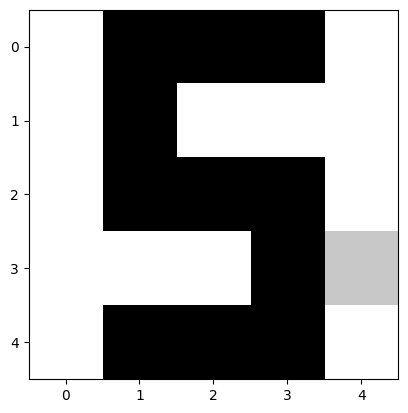

In [ ]:
Letter_S = np.array( [[255, 0, 0, 0, 255],
                      [255, 0, 255, 255, 255],
                      [255, 0, 0, 0, 255],
                  [255, 255, 255, 0, 255],
                      [255, 0, 0, 0, 255]])

plt.imshow(Letter_S,cmap='gray')

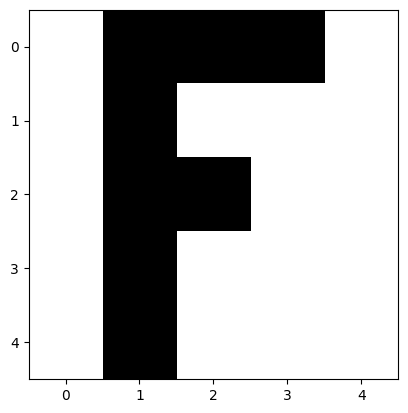

In [ ]:
Letter_S = np.array( [[255, 0, 0, 0, 255],
                      [255, 0, 255, 255, 255],
                      [255, 0,0, 255, 255],
                      [255, 0,255, 255, 255],
                      [255, 0,255, 255, 255],
])

plt.imshow(Letter_S,cmap='gray')

8. Plot Each Color Channel from RGB colorspace

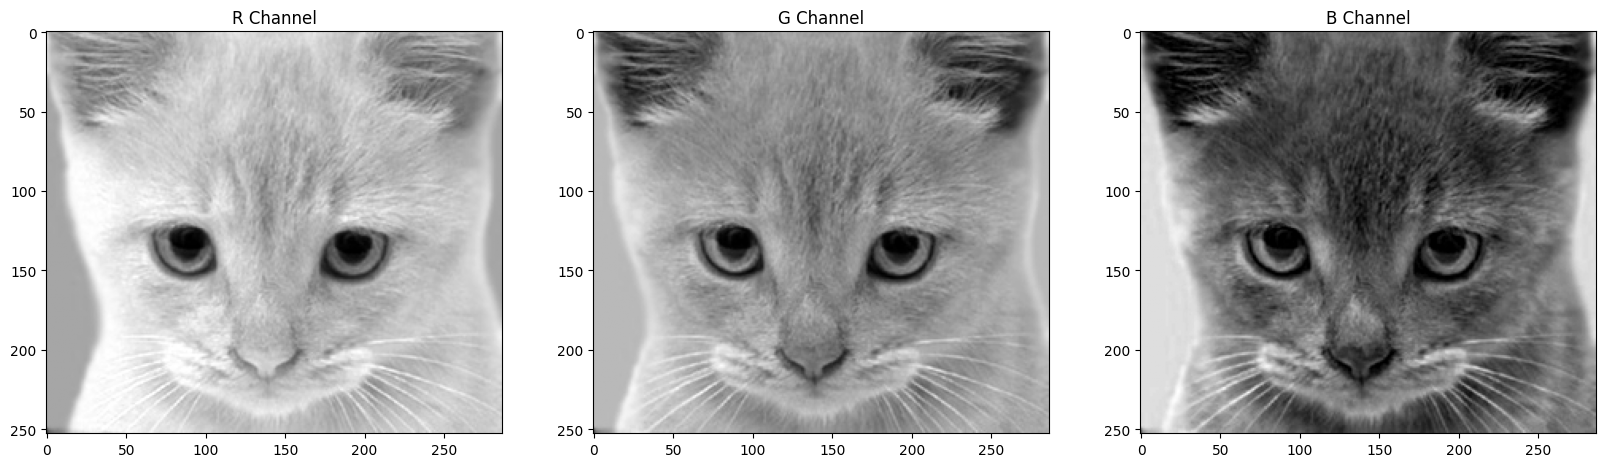

In [ ]:
# load the image
img = cv2.imread('./img1.jpg')

# Change the image into desired colorspace
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Store values of each channel in different array
r = rgb[:,:,0]
g = rgb[:,:,1]
b = rgb[:,:,2]

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.set_title('R Channel')
ax1.imshow(r, cmap='gray')

ax2.set_title('G Channel')
ax2.imshow(g,cmap='gray')

ax3.set_title('B Channel')
ax3.imshow(b,cmap='gray')

## Pre-processing !!
PART 2 Objectives:

1. How to perform simple image transformations? Crop, Flip, Rotate, Resize, Translate, Sheer
2. How to add two Images
3. Multiply an image by a scaler
4. Blend two Images
5. Common Types of Noise

1. Crop Image


(253, 287, 3)
(143, 177, 3)


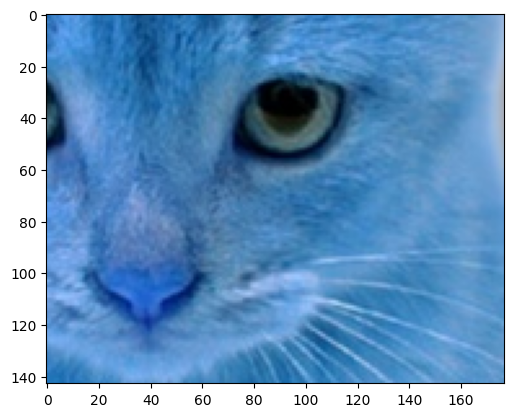

In [ ]:
img = cv2.imread('./img1.jpg')
print(img.shape) # Print image shape: rows, columns, and channels
plt.imshow(img)

# Cropping an image
cropped_image = img[100:243, 100:277]
print(cropped_image.shape)
plt.imshow(cropped_image)

2. Flip image

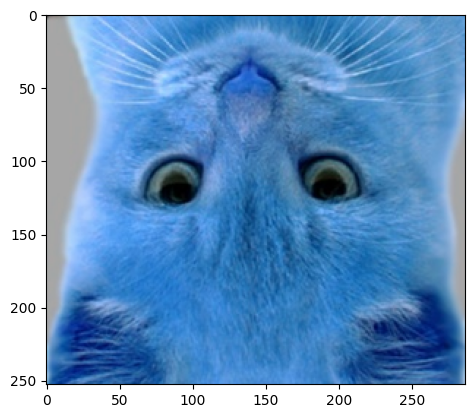

In [ ]:
img = cv2.imread('./img1.jpg')
flipped_image = cv2.flip(img, 0)  # 1 for horizontal flip, 0 for vertical, -1 for both
plt.imshow(flipped_image)

3. Rotate Image


Q. What is an Affine Transformation?

Visit: https://docs.opencv.org/4.x/d4/d61/tutorial_warp_affine.html

    cv.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]] )
    # src: input image
    # M: Transformation matrix
    # dsize: size of the output image
    # flags: interpolation method to be used

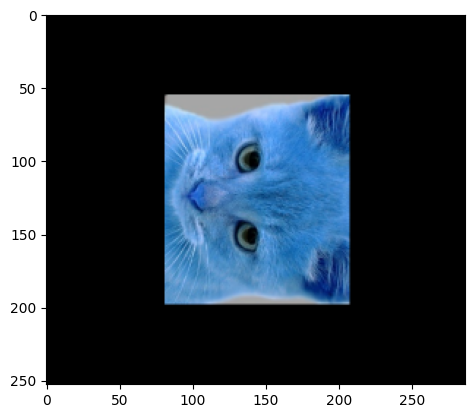

In [ ]:
img = cv2.imread('./img1.jpg')
rows,cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),-90,.5)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

4. Resize image

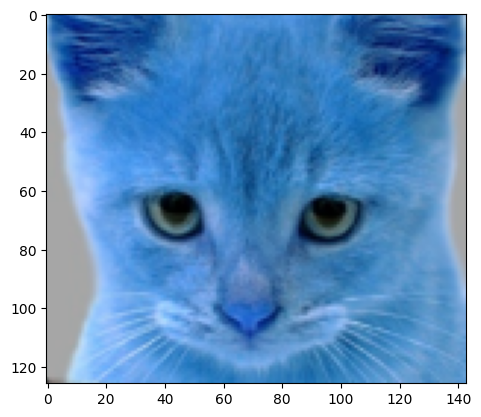

In [ ]:
img = cv2.imread('./img1.jpg')
width = int(img.shape[1] * 0.5)
height = int(img.shape[0] * 0.5)
dim = (width, height)
resized_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_image)

5. Translate/Shift


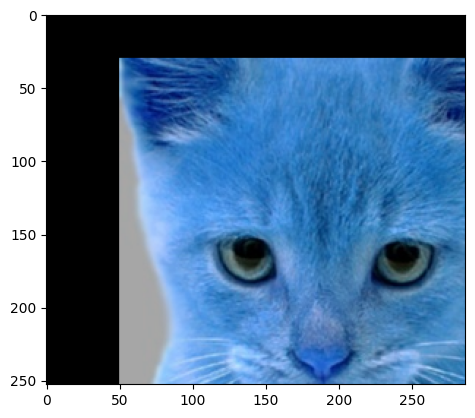

In [ ]:
img = cv2.imread('./img1.jpg')

# Define the translation values
shift_x = 50  # shift right by 50 pixels
shift_y = 30  # shift down by 30 pixels

# Create the translation matrix
translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])

# Apply the translation
translated_image = cv2.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0]))

plt.imshow(translated_image)

6. Sheer


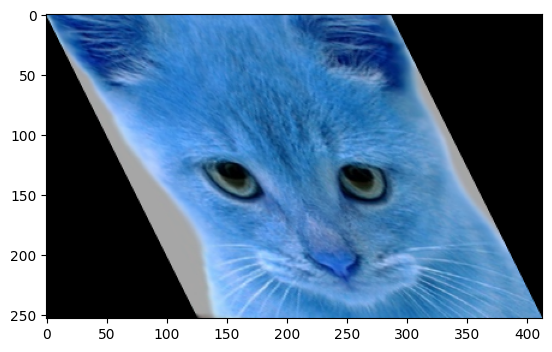

In [ ]:
# Load the image
img = cv2.imread('./img1.jpg')

# Get image dimensions
height, width = img.shape[:2]

# Define shear factor
shear_x = 0.5  # Shear along the x-axis
shear_y = 0.0  # No shear along the y-axis

# Create the affine transformation matrix for shear
shear_matrix = np.float32([
    [1, shear_x, 0],  # Shear along the x-axis
    [shear_y, 1, 0]   # No shear along the y-axis
])

# Apply the shear transformation
sheared_image = cv2.warpAffine(img, shear_matrix, (width + int(shear_x * height), height))

# Display the result
plt.imshow(sheared_image)

7. Stretch

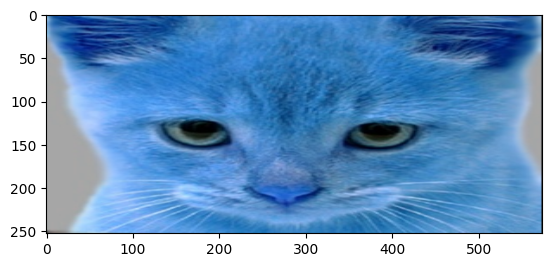

In [ ]:
# Load the image
img = cv2.imread('./img1.jpg')

# Get image dimensions
height, width = img.shape[:2]

# Define stretch factors
stretch_x = 2  # Stretch along the x-axis (1.5 times the original width)
stretch_y = 1.0 # No stretch along the y-axis (1.0 keeps the original height)

# Create the affine transformation matrix for stretch
stretch_matrix = np.float32([
    [stretch_x, 0, 0],
    [0, stretch_y, 0]
])

# Apply the stretch transformation
stretched_image = cv2.warpAffine(img, stretch_matrix, (int(width * stretch_x), int(height * stretch_y)))

# Display the result
plt.imshow(stretched_image)

8. Add 2 Images

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [ ]:
a = cv2.imread('./imgA.jpg')
b = cv2.imread('./imgB.jpg')

c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
d = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)

(385, 385, 3)


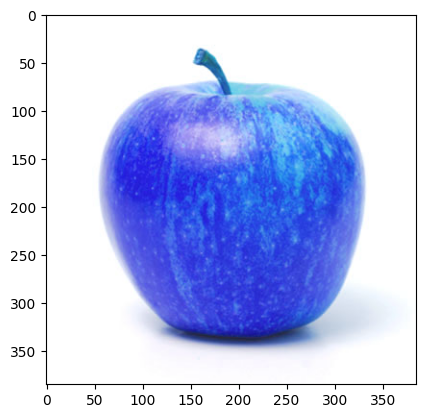

In [ ]:
print(a.shape)
plt.imshow(a)

(225, 225, 3)


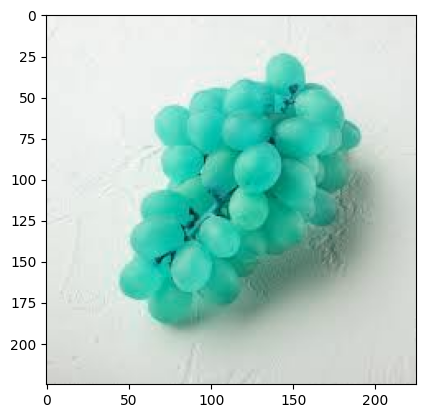

In [ ]:
print(b.shape)
plt.imshow(b)

In [ ]:
width = 225
height = 225
dim = (width, height)
d = cv2.resize(d, dim, interpolation = cv2.INTER_AREA)

In [ ]:
db = b + d

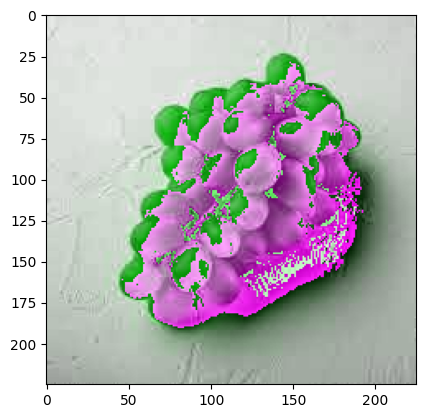

In [ ]:
plt.imshow(cv2.cvtColor(db.astype(np.uint8), cv2.COLOR_BGR2RGB))

9. Multiply by a scaler

In [ ]:
d = cv2.imread('./imgA.jpg')

In [ ]:
scalar = 50

In [ ]:
new_image = d * scalar

In [ ]:
# Convert the new image to uint8 format.
new_image = new_image.astype('uint8')

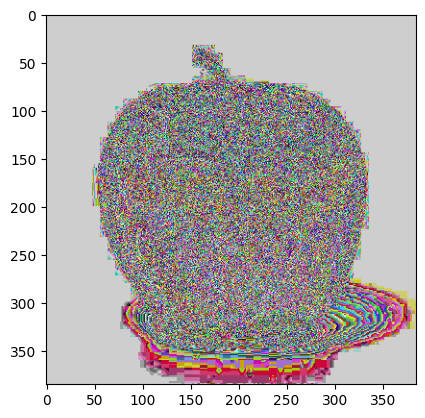

In [ ]:
# Display the new image.
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

10. Blend 2 Images

In [ ]:
d = cv2.imread('./imgA.jpg')
b = cv2.imread('./imgB.jpg')

In [ ]:
width = 225
height = 225
dim = (width, height)
d = cv2.resize(d, dim, interpolation = cv2.INTER_AREA)

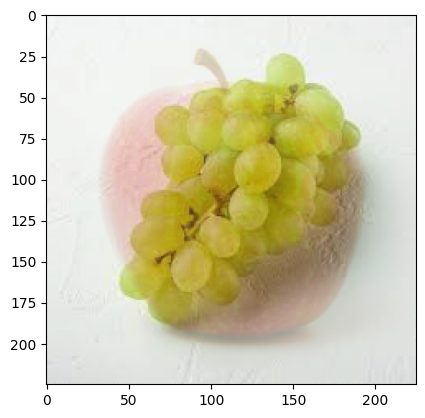

In [ ]:
result =0.75*b+0.25*d
result = result.astype('uint8')

plt.imshow(cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB))

11. Noise



Random noise

Random variation of brightness or color information in images.

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

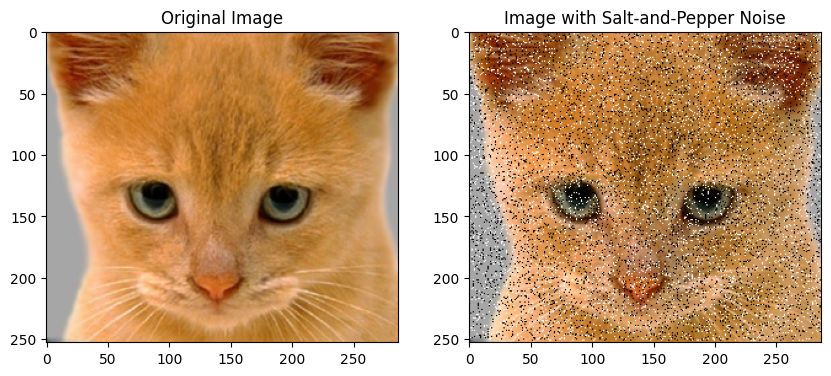

In [ ]:
# Load your image using OpenCV or any other library
image = cv2.imread('./img1.jpg', cv2.IMREAD_COLOR)

row,col,ch= d.shape

# Parameters for salt-and-pepper noise
prob = 0.05  # Probability of noise (0.05 means 5% of the pixels will be noisy)

# Generate random noise
noisy_image = np.copy(image)
num_salt = np.ceil(prob * image.size * 0.5).astype(int)  # Number of 'salt' pixels
num_pepper = np.ceil(prob * image.size * 0.5).astype(int)  # Number of 'pepper' pixels

# Apply 'salt' noise (white pixels)
coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
noisy_image[coords[0], coords[1]] = 255

# Apply 'pepper' noise (black pixels)
coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
noisy_image[coords[0], coords[1]] = 0

# Display the original and noisy images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Image with Salt-and-Pepper Noise")
plt.imshow(cv2.cvtColor(noisy_image.astype(np.uint8), cv2.COLOR_BGR2RGB))

plt.show()


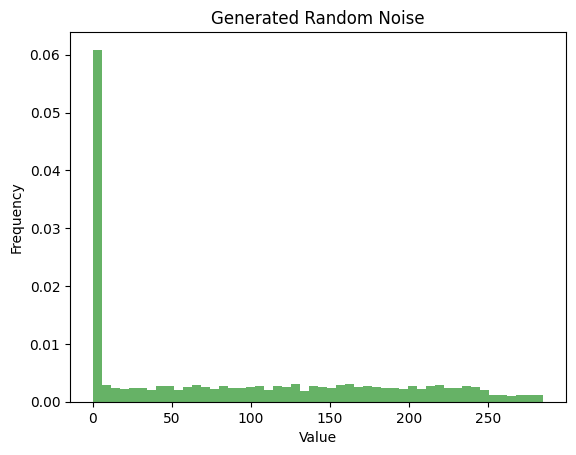

In [ ]:
# Generate Random noise
random_noise = np.array(coords)

# Flatten the 3D noise array into 1D for histogram plotting
flattened_noise = random_noise.flatten()

# Plot the histogram of the generated Gaussian noise
plt.hist(flattened_noise, bins=50, density=True, alpha=0.6, color='g')
plt.title('Generated Random Noise')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

**Gausian** Noise

Gaussian Noise is a statistical noise with a Gaussian (normal) distribution.

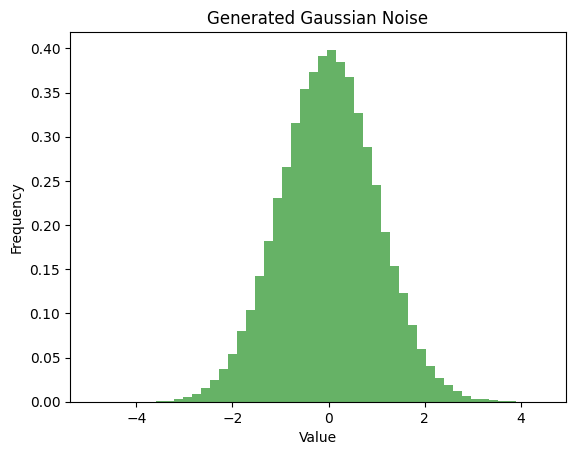

In [ ]:
# Set the mean and standard deviation of the Gaussian distribution
mean = 0
std_dev = 1

# Set the number of samples
num_samples = 100000

# Generate Gaussian noise
gaussian_noise = np.random.normal(mean, std_dev, num_samples)

# Plot the histogram of the generated Gaussian noise
plt.hist(gaussian_noise, bins=50, density=True, alpha=0.6, color='g')
plt.title('Generated Gaussian Noise')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


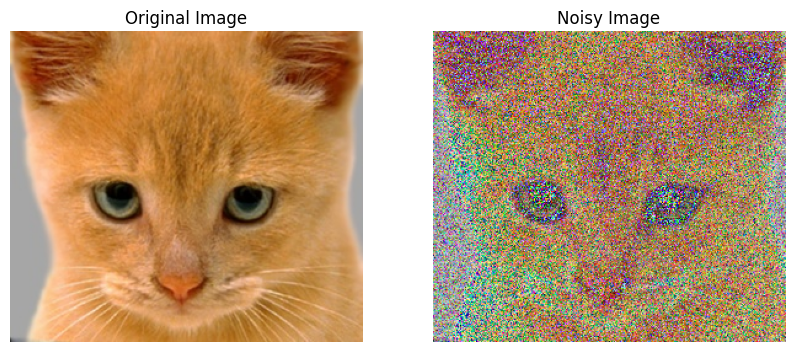

In [ ]:

# Load your image using OpenCV or any other library
img = cv2.imread('./img1.jpg')

# Generate Gaussian noise with the same size as the image
noise = np.random.randn(*img.shape) * 50

# Add the noise to the image
output = img + noise

# Display the original and noisy images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

12. Brightness Adjustment

In [ ]:
def brightness_augmentation(image, factor):
  adjusted_image = np.clip(image * factor, 0, 255).astype(np.uint8)
  return adjusted_image

# Example usage:
img = cv2.imread('./img1.jpg')

# Increase brightness by 20%
bright_img = brightness_augmentation(img, 1.5)

# Decrease brightness by 30%
dark_img = brightness_augmentation(img, 0.7)

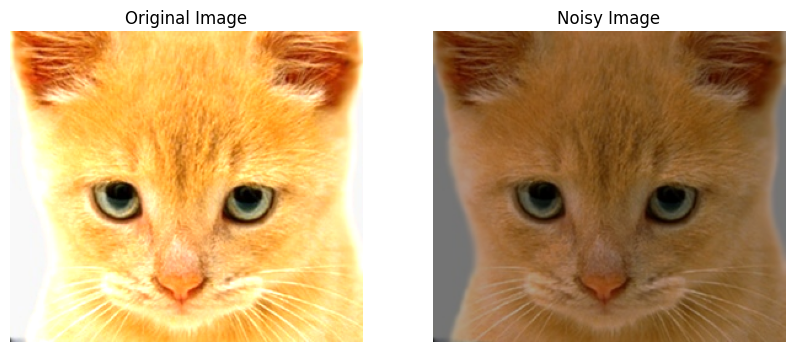

In [ ]:
# Display the original and noisy images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(cv2.cvtColor(dark_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()